In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 2. Load Dataset
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## 3. Eksplorasi Data


In [3]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [4]:
# Statistik Deskriptif
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


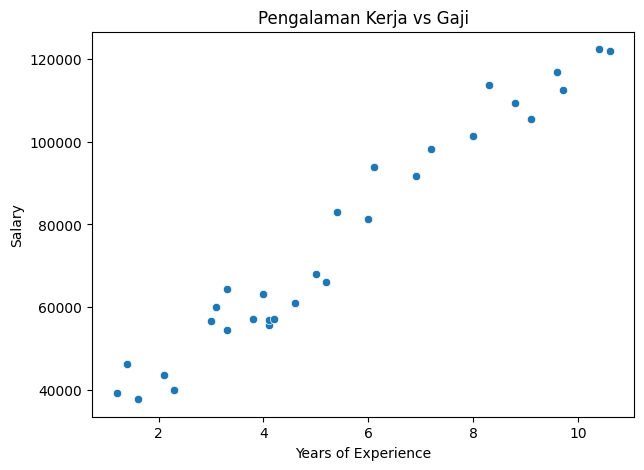

In [5]:
# Visualisasi Scatter Plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Pengalaman Kerja vs Gaji')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## 4. Persiapan Data


In [6]:
# Cek missing value
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

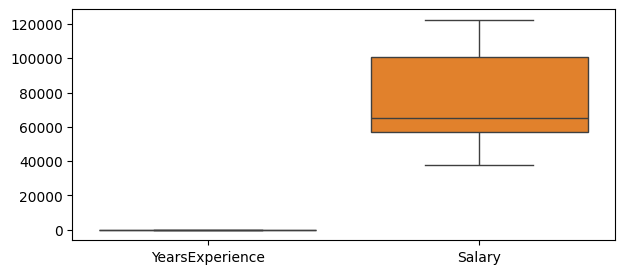

In [7]:
# Cek outlier secara sederhana
plt.figure(figsize=(7,3))
sns.boxplot(data=df[['YearsExperience','Salary']])
plt.show()

## 5. Split Data: Training & Test


In [8]:
X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}')

Train size: 24, Test size: 6


## 6. Pemodelan: Linear Regression


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

Intercept: 24380.20147947369
Coefficient: 9423.81532303098


## 7. Evaluasi Model


In [10]:
# Prediksi
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'R2 Score      : {r2:.4f}')
print(f'MSE           : {mse:.2f}')
print(f'RMSE          : {rmse:.2f}')

R2 Score      : 0.9024
MSE           : 49830096.86
RMSE          : 7059.04


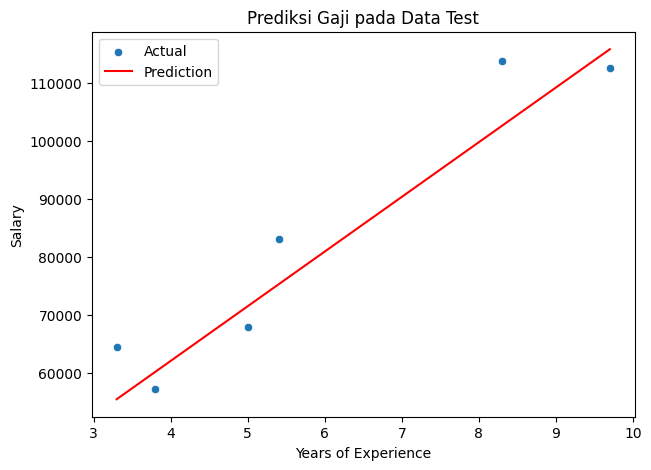

In [11]:
# Visualisasi prediksi
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, label='Actual')
sns.lineplot(x=X_test['YearsExperience'], y=y_pred, color='red', label='Prediction')
plt.title('Prediksi Gaji pada Data Test')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## 8. Interpretasi dan Kesimpulan
- Model regresi linier sederhana mampu memodelkan hubungan antara pengalaman kerja dan gaji.
- Nilai koefisien menunjukkan bahwa setiap penambahan satu tahun pengalaman kerja, rata-rata gaji bertambah sebesar nilai koefisien.
- Evaluasi dengan $R^2$, MSE, dan RMSE digunakan untuk menilai performa model.

Notebook ini dapat dikembangkan lebih lanjut dengan mencoba teknik feature engineering, menambah fitur lain, atau menggunakan model regresi lain untuk membandingkan hasil.
